# Logistic Regression

## Step1-Import required libraries

In [55]:
import numpy as np  # for the mathematical operations
import pandas as pd #for data manipulation and cleaning
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Step2:Load the dataset

In [58]:
# Load dataset
df = pd.read_csv('Churn_Modelling.csv')

In [60]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [62]:
df.info() # for datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [64]:
df.shape # for rows and columns

(10000, 14)

## Data Preprocessing

In [67]:
# Drop unnecessary columns
df.drop(['Surname','Geography'],axis=1,inplace=True)

In [69]:
df.head()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [73]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [77]:
df

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,1,42,3,75075.31,2,1,0,92888.52,1


In [79]:
#checking for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [81]:
# statistics measures of data
df.describe()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [108]:
df['Exited'].value_counts() #to check the dataset is balanced or not

Exited
0.0    10000
Name: count, dtype: int64

## Step4: Exploratory Data Analysis

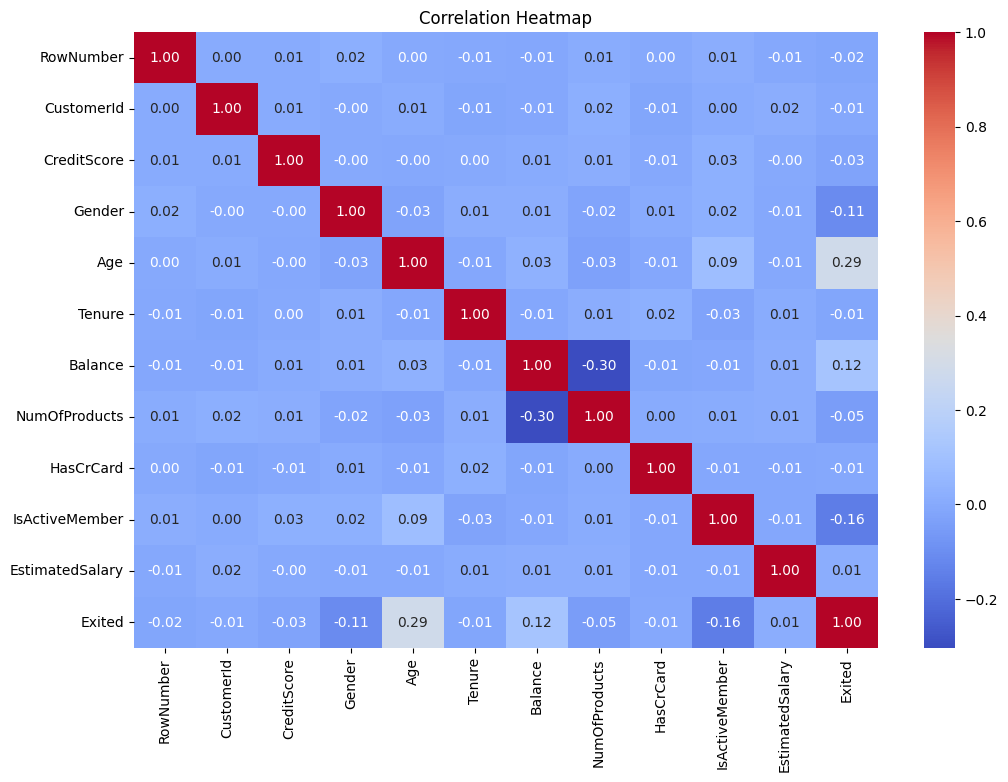

In [84]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

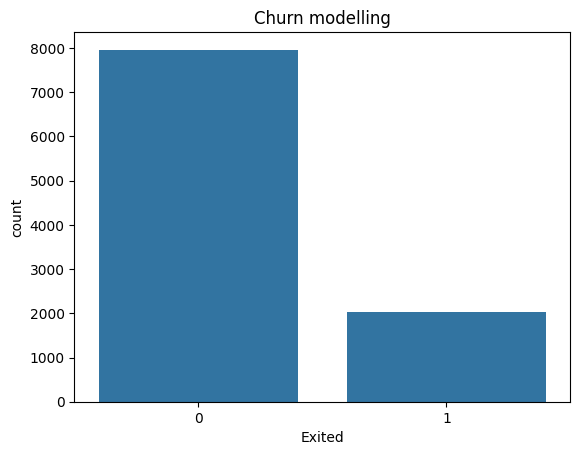

In [88]:
# balancing the dataset
sns.countplot(x='Exited', data=df)
plt.title('Churn modelling')
plt.show()

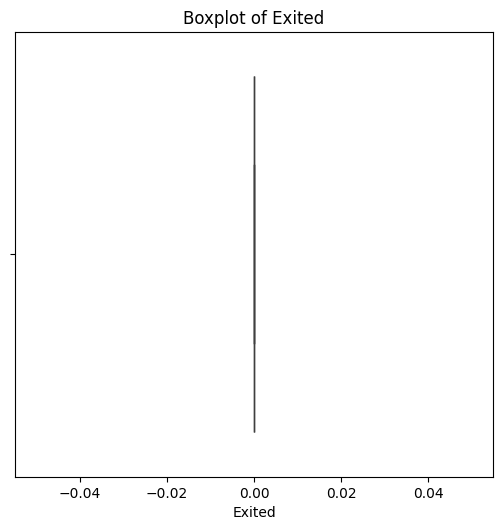

In [104]:
# boxplot for the Exited
# Visualization of outliers using boxplots
plt.figure(figsize=(15, 10))
# Boxplot for Exited
plt.subplot(2, 3, 1)
sns.boxplot(x=df['Exited'])
plt.title('Boxplot of Exited')
plt.xlabel('Exited')
plt.tight_layout()
plt.show()

## Step5: Divide the dataset into X and Y varaible

In [123]:
# Identify features and target variables
X=df.drop('Exited',axis=1)
y=df['Exited']

## Step 6: Splitting dataset into train and test

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Balancing the dataset

In [177]:
print(df['Exited'].value_counts())  # Replace 'Exited' with your column name

Exited
0.0    10000
Name: count, dtype: int64


In [179]:
# Replace feature values with reasonable defaults or random values
minority_sample = pd.DataFrame([np.mean(X, axis=0)], columns=X.columns)
X = pd.concat([X, minority_sample], ignore_index=True)
y = pd.concat([y, pd.Series([1])], ignore_index=True)  # Add a minority class label


In [181]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_res, y_res = undersampler.fit_resample(X, y)

# Check the class distribution
print(pd.Series(y_res).value_counts())


0.0    4
1.0    4
Name: count, dtype: int64


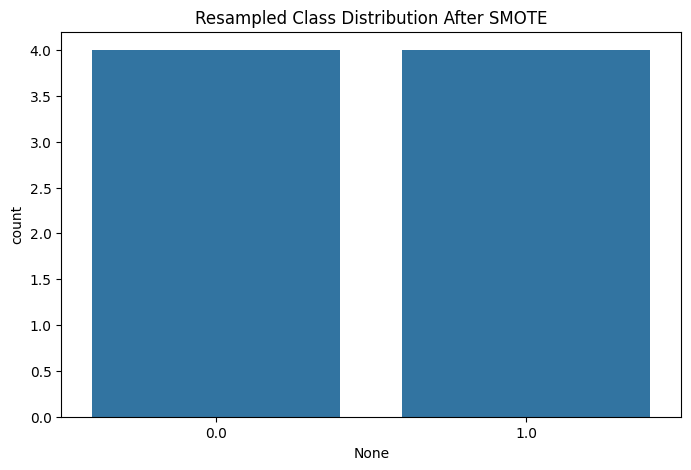

In [183]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_res)
plt.title('Resampled Class Distribution After SMOTE')
plt.show()

## Step 7:Train the model

In [186]:
# Train the model using training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression( penalty='l2', C=1.0,)
classifier.fit(X_train, y_train)

LogisticRegression()

## Step 8:Model Prediction

In [192]:
# predicting the model
y_pred = classifier.predict(X_test)

## Step 9:Model Evaluation

Confusion Matrix:
 [[2000    0]
 [   1    0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2000
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      2001
   macro avg       0.50      0.50      0.50      2001
weighted avg       1.00      1.00      1.00      2001

Accuracy Score: 0.9995002498750625


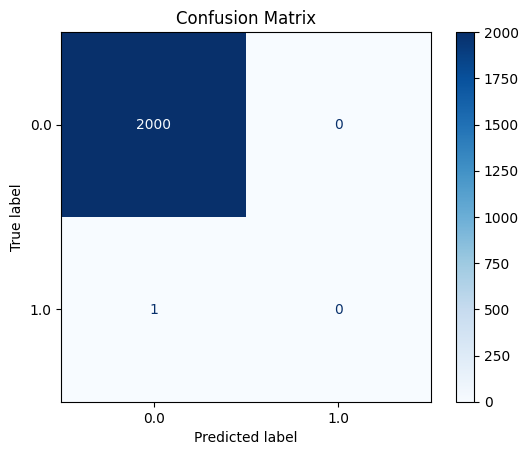

In [196]:
#for evaluting the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
# Display confusion matrixA
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [198]:
# Predictions on training set
y_train_pred = classifier.predict(X_train)
# Evaluate on training data
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score(X_test, y_test)

Training Accuracy: 0.9998750156230471
Test Accuracy: 0.9995002498750625


# Gradient Boosting  

## Import necessary libraries

In [249]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model

In [252]:
# Train the model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

## Model Prediction

In [255]:
# Make predictions
y_pred = gb_model.predict(X_test)

## Model Evaluation

Confusion Matrix:
 [[1998    0]
 [   0    3]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1998
         1.0       1.00      1.00      1.00         3

    accuracy                           1.00      2001
   macro avg       1.00      1.00      1.00      2001
weighted avg       1.00      1.00      1.00      2001

Accuracy Score: 1.0


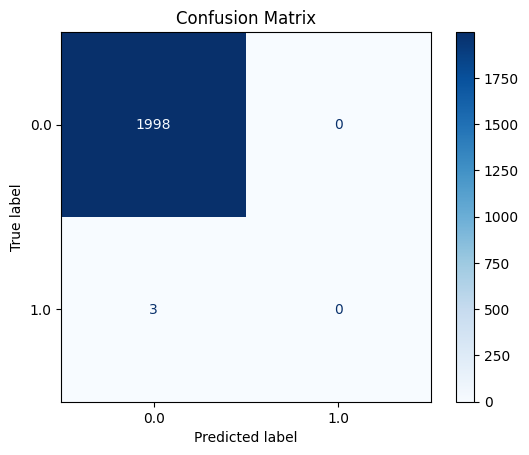

In [258]:
#for evaluting the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
# Display confusion matrixA
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [260]:
# Predictions on training set
y_train_pred = classifier.predict(X_train)
# Evaluate on training data
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score(X_test, y_test)

Training Accuracy: 0.9998750468574285
Test Accuracy: 1.0


# Random Forest

In [300]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

## Split dataset into train and test

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model

In [306]:
# Initialize the Random Forest model
model= RandomForestClassifier(
    n_estimators=100,           # Number of trees
    max_depth=10,               # Maximum depth of each tree
    min_samples_split=5,        # Minimum samples required to split a node
    min_samples_leaf=2,         # Minimum samples required at each leaf node
    max_features='sqrt',        # Number of features to consider when looking for the best split
    bootstrap=True,             # Use bootstrap samples for training
    random_state=42
)

In [308]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [309]:
y_pred = model.predict(X_test)

## Model Evaluation

Confusion Matrix:
 [[1998    0]
 [   3    0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1998
         1.0       0.00      0.00      0.00         3

    accuracy                           1.00      2001
   macro avg       0.50      0.50      0.50      2001
weighted avg       1.00      1.00      1.00      2001

Accuracy Score: 0.9985007496251874


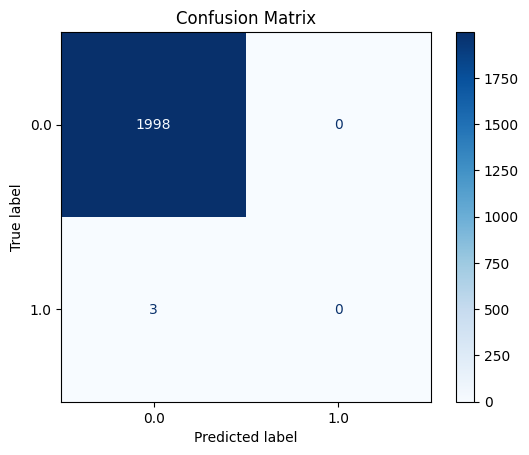

In [313]:
#for evaluting the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
# Display confusion matrixA
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [315]:
# Predictions on training set
y_train_pred = classifier.predict(X_train)
# Evaluate on training data
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score(X_test, y_test)

Training Accuracy: 0.9998750468574285
Test Accuracy: 0.9985007496251874
